#          Lab5. Diabetes Classification using Logistic Regression


### Step1. [Understand Data]

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.Glucose.value_counts()

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

### Step2. [Build Logistic regression Model]

In [8]:
X=df.drop(["Outcome"],axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
y=df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter=StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state=12)
for train,test in splitter.split(X,y):     
    X_train = X.loc[train]
    y_train = y.loc[train]
    X_test = X.loc[test]
    y_test = y.loc[test]

In [11]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
322,0,124,70,20,0,27.4,0.254,36
399,3,193,70,31,0,34.9,0.241,25
34,10,122,78,31,0,27.6,0.512,45
73,4,129,86,20,270,35.1,0.231,23
305,2,120,76,37,105,39.7,0.215,29
...,...,...,...,...,...,...,...,...
145,0,102,75,23,0,0.0,0.572,21
222,7,119,0,0,0,25.2,0.209,37
148,5,147,78,0,0,33.7,0.218,65
419,3,129,64,29,115,26.4,0.219,28


In [12]:
from sklearn.linear_model import LogisticRegression
LOR=LogisticRegression(penalty='l2',C=10.0)
LOR=LOR.fit(X_train,y_train)

In [13]:
y_pred=LOR.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

### Step3. [Predict on a new sample]

In [14]:
new_person=LOR.predict([[6,200,90,10,25,23.3,0.672,42]])
if new_person==1:
    print("diabetic",new_person)
else:
    print("non-Diabetic",new_person)

diabetic [1]


C:\Users\8mpra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Step3. [Compute Classification Metrics]

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7916666666666666

In [16]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.7213114754098361

In [17]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.6567164179104478

In [18]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.760358208955224

### Step4. [Understand Correlation]

In [19]:
from sklearn.metrics import confusion_matrix
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

[[108  17]
 [ 23  44]]


<AxesSubplot:>

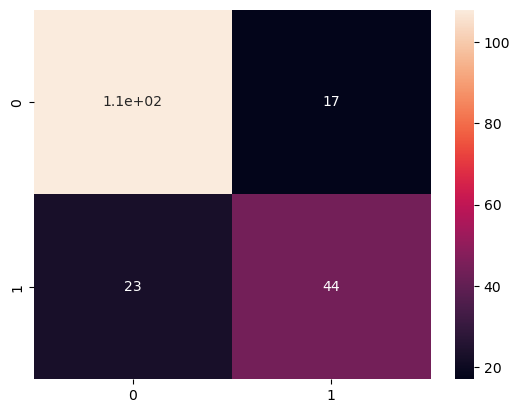

In [20]:
import seaborn as sns
sns.heatmap(cfm, annot=True)

### Step-5. [Normalization using MinMaxScaler and rebuild LOR]

In [21]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
mm_X_train=mm.fit_transform(X_train)
mm_X_test=mm.transform(X_test)
mm_X_train
mm_X_test

array([[0.23529412, 0.77386935, 0.59016393, ..., 0.46646796, 0.11101623,
        0.26666667],
       [0.05882353, 0.78894472, 0.59016393, ..., 0.38152012, 0.01921435,
        0.05      ],
       [0.76470588, 0.79396985, 0.93442623, ..., 0.63040238, 0.0764304 ,
        0.38333333],
       ...,
       [0.05882353, 0.61306533, 0.73770492, ..., 0.74068554, 0.10546541,
        0.16666667],
       [0.17647059, 0.75376884, 0.62295082, ..., 0.31296572, 0.05508113,
        0.26666667],
       [0.11764706, 0.64321608, 0.52459016, ..., 0.59612519, 0.43680615,
        0.05      ]])

In [22]:
mm_lor=LogisticRegression()
mm_lor=mm_lor.fit(mm_X_train,y_train)

In [23]:
mm_y_pred=mm_lor.predict(mm_X_test)
mm_y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
accuracy_score(y_test,mm_y_pred)

0.7864583333333334

In [25]:
precision_score(y_test,mm_y_pred)

0.76

In [26]:
recall_score(y_test,mm_y_pred)

0.5671641791044776

In [27]:
roc_auc_score(y_test,mm_y_pred)

0.7355820895522388

### Step-6: [Normalization using StandardScaler and rebuild LOR]

In [28]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss_X_train=ss.fit_transform(X_train)
ss_X_test=ss.transform(X_test)

In [29]:
ss_lor=LogisticRegression()
ss_lor.fit(ss_X_train,y_train)
ss_y_pred=ss_lor.predict(ss_X_test)

In [30]:
accuracy_score(y_test,ss_y_pred)

0.7864583333333334

In [31]:
precision_score(y_test,ss_y_pred)

0.7166666666666667

In [32]:
recall_score(y_test,ss_y_pred)

0.6417910447761194

In [33]:
ss_auc=roc_auc_score(y_test,ss_y_pred)
ss_auc

0.7528955223880597

### Step-7. [Plot ROC Curve]

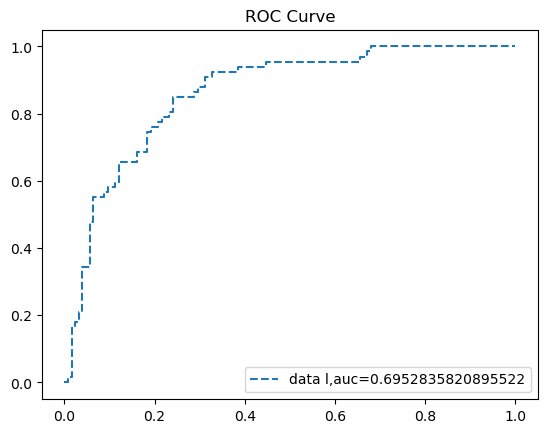

In [34]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

pred_prob=mm_lor.predict_proba(mm_X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
plt.plot(fpr,tpr,linestyle='--',label='data l,auc=0.6952835820895522')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Step-8. [Comparison with KNN classifier]

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn=knn.fit(X_train,y_train)
knn_y_pred=knn.predict(X_test)

C:\Users\8mpra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [36]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
m_X_train=m.fit_transform(X_train)
m_X_test=m.transform(X_test)

In [37]:
knn.fit(m_X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [38]:
m_y_pred=knn.predict(m_X_test)
m_y_pred

C:\Users\8mpra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [39]:
accuracy_score(y_test,m_y_pred)

0.7395833333333334

In [40]:
precision_score(y_test,m_y_pred)

0.717948717948718

In [41]:
recall_score(y_test,m_y_pred)

0.417910447761194

In [42]:
knn_auc=roc_auc_score(y_test,m_y_pred)
knn_auc

0.6649552238805969

### Step-9: Update ROC Curve

In [43]:
pred_prob2=knn.predict_proba(m_X_test)

In [44]:
from sklearn.metrics import roc_curve
fpr2,tpr2,thresh2=roc_curve(y_test,pred_prob2[:,1],pos_label=1)

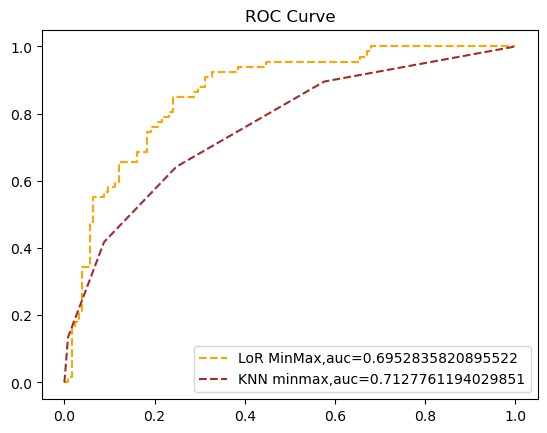

In [45]:
plt.plot(fpr,tpr,linestyle='--',color='orange',label='LoR MinMax,auc=0.6952835820895522')
plt.plot(fpr2,tpr2,linestyle='--',color='brown',label='KNN minmax,auc=0.7127761194029851')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Step 10: Regularization

In [46]:
from sklearn.linear_model import LogisticRegressionCV
model1=LogisticRegressionCV(Cs=10,cv=4,penalty='l1',solver='liblinear')
model2=LogisticRegressionCV(Cs=10,cv=4,penalty='l2')

In [47]:
model1.fit(mm_X_train,y_train)
model2.fit(mm_X_train,y_train)

LogisticRegressionCV(cv=4)

In [48]:
rg_y_pred1 = model1.predict(mm_X_test)
rg_y_pred2 = model2.predict(mm_X_test)

In [49]:
l1_auc=roc_auc_score(y_test, rg_y_pred1)
l1_auc

0.7465074626865671

In [50]:
l2_auc=roc_auc_score(y_test, rg_y_pred2)
l2_auc

0.7568955223880597

### Step11.[Update ROC curve]

In [51]:
pred_prb7 = model1.predict_proba(mm_X_test)
pred_prb8 = model2.predict_proba(mm_X_test)
fpr,tbr,threshold = roc_curve(y_test, pred_prob[:,1],pos_label=1)
fpr1,tbr1,threshold1 = roc_curve(y_test, pred_prob2[:,1],pos_label=1)
fpr2,tbr2,threshold2= roc_curve(y_test, pred_prb7[:,1],pos_label=1)
fpr3,tbr3,threshold3 = roc_curve(y_test, pred_prb8[:,1],pos_label=1)

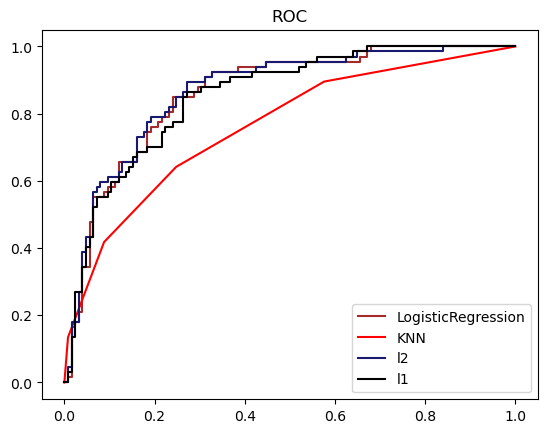

In [52]:
plt.plot(fpr, tbr, linestyle='-', color='brown', label='LogisticRegression')
plt.plot(fpr1, tbr1, linestyle='-', color='red', label='KNN')
plt.plot(fpr3, tbr3, linestyle='-', color='midnightblue', label='l2')
plt.plot(fpr2, tbr2, linestyle='-', color='black', label='l1')

plt.title('ROC')
plt.legend(loc = 'best')
plt.show()